In [1]:
# Install necessary packages if not already installed
# !pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

In [5]:
# Load your dataset (adjust path if needed)
df = pd.read_csv(r"C:\Users\ravin\OneDrive\Documents\ALY6040\Module4_Assign\diabetes_dataset.csv")

In [6]:
# Quick overview
print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())

(10000, 21)
   Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference  \
0           0   58  Female     White  35.8                 83.4   
1           1   48    Male     Asian  24.1                 71.4   
2           2   34  Female     Black  25.0                113.8   
3           3   62    Male     Asian  32.7                100.4   
4           4   27  Female     Asian  33.5                110.8   

   Fasting_Blood_Glucose  HbA1c  Blood_Pressure_Systolic  \
0                  123.9   10.9                      152   
1                  183.7   12.8                      103   
2                  142.0   14.5                      179   
3                  167.4    8.8                      176   
4                  146.4    7.1                      122   

   Blood_Pressure_Diastolic  ...  Cholesterol_HDL  Cholesterol_LDL   GGT  \
0                       114  ...             50.2             99.2  37.5   
1                        91  ...             62.0            146.4  88.5

In [10]:
list(df)

['Unnamed: 0',
 'Age',
 'Sex',
 'Ethnicity',
 'BMI',
 'Waist_Circumference',
 'Fasting_Blood_Glucose',
 'HbA1c',
 'Blood_Pressure_Systolic',
 'Blood_Pressure_Diastolic',
 'Cholesterol_Total',
 'Cholesterol_HDL',
 'Cholesterol_LDL',
 'GGT',
 'Serum_Urate',
 'Physical_Activity_Level',
 'Dietary_Intake_Calories',
 'Alcohol_Consumption',
 'Smoking_Status',
 'Family_History_of_Diabetes',
 'Previous_Gestational_Diabetes']

In [11]:
# Drop rows with missing values (optional but common)
df.dropna(inplace=True)


In [12]:

# Encode categorical variables
categorical_cols = ['Sex', 'Ethnicity', 'Smoking_Status', 
                    'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes']

In [18]:
# Step 1: If you're generating labels based on a condition:
df['Diabetes'] = ((df['Fasting_Blood_Glucose'] >= 126) | (df['HbA1c'] >= 6.5)).astype(int)

# Step 2: Encode categorical columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 3: Define features and labels
target = 'Diabetes'
features = df.drop(columns=[target])
labels = df[target]

1. Apply Label Encoding to all categorical columns:


In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode all categorical columns
categorical_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Smoking_Status', 'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes']
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Now, the dataset only contains numeric values

In [25]:
from sklearn.preprocessing import StandardScaler

# Separate the features (X) and target (y)
target = 'Diabetes'
features = df.drop(columns=[target])  # Remove target column
labels = df[target]  # Target column

# Apply StandardScaler to the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Now you can proceed with splitting the data, training, and evaluation

2. Splitting the Data into Training and Test Sets:

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

Training the Support Vector Machine (SVM) Model:

In [27]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(kernel='linear')  # You can try different kernels: 'linear', 'poly', 'rbf', etc.

# Train the model on the training set
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

4. Evaluating the Model:

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report (includes precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9573
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       143
           1       0.97      0.99      0.98      1193

    accuracy                           0.96      1336
   macro avg       0.92      0.85      0.88      1336
weighted avg       0.96      0.96      0.96      1336

Confusion Matrix:
[[ 102   41]
 [  16 1177]]


OPTIONAL: since our Accuracy level is good enough for model so it is not necessary to do this

In [29]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel types
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Use the best model
svm_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = svm_model.predict(X_test)
print(f"Accuracy after tuning: {accuracy_score(y_test, y_pred):.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, k

ROC AUC Score: 0.9883


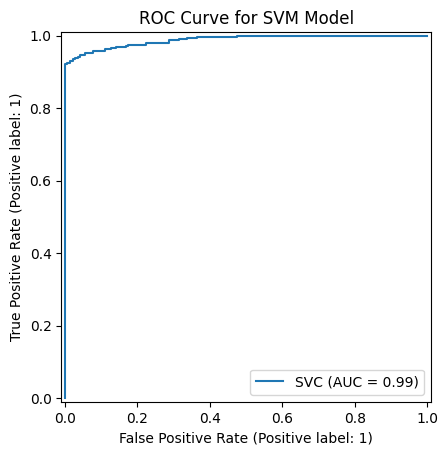

In [35]:
# Initialize the SVM classifier with probability=True
svm_model = SVC(kernel='linear', probability=True)

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Get probabilities of the positive class (for AUC)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("ROC Curve for SVM Model")
plt.show()


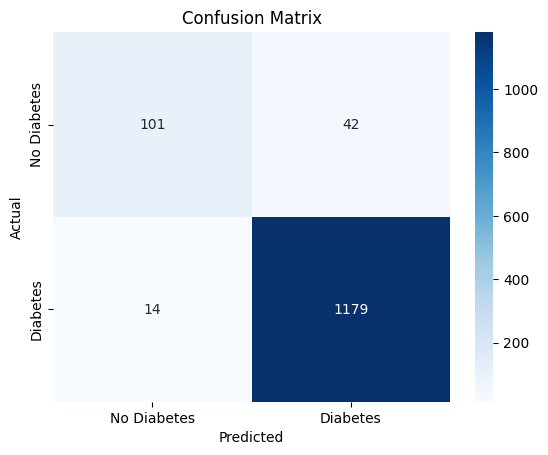

In [36]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()